In [1]:
import datetime
dt_now = datetime.datetime.now()
print(dt_now.strftime('%Y%m%d_%H%M'))

20241023_1511


In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch
import numpy as np
print(np.array(torch.tensor([1])))

[1]


In [6]:
#PyTorchはモデルの最終レイヤに損失関数とsoftmaxが入っていない loss_fnに入っているのでカスタム可能
import torch
from torchinfo import summary
import torchvision.models as models
import torch.nn as nn

resnet50 = models.resnet50(weights='DEFAULT')


resnet50.conv1 = torch.nn.Conv2d(3,64,kernel_size = (7,7),stride = (2,2), padding = (3,3), bias = False)
num_ftrs = resnet50.fc.in_features
#modifying final layer
resnet50.fc = nn.Linear(num_ftrs,2)
summary(model=resnet50, input_size=(8, 3, 16, 16))


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [8, 2]                    --
├─Conv2d: 1-1                            [8, 64, 8, 8]             9,408
├─BatchNorm2d: 1-2                       [8, 64, 8, 8]             128
├─ReLU: 1-3                              [8, 64, 8, 8]             --
├─MaxPool2d: 1-4                         [8, 64, 4, 4]             --
├─Sequential: 1-5                        [8, 256, 4, 4]            --
│    └─Bottleneck: 2-1                   [8, 256, 4, 4]            --
│    │    └─Conv2d: 3-1                  [8, 64, 4, 4]             4,096
│    │    └─BatchNorm2d: 3-2             [8, 64, 4, 4]             128
│    │    └─ReLU: 3-3                    [8, 64, 4, 4]             --
│    │    └─Conv2d: 3-4                  [8, 64, 4, 4]             36,864
│    │    └─BatchNorm2d: 3-5             [8, 64, 4, 4]             128
│    │    └─ReLU: 3-6                    [8, 64, 4, 4]             --
│ 

In [2]:
import torch
import torch.nn as nn

# モデルの出力（予測された確率）
output = torch.randn(1, requires_grad=True)  # 例えば、モデルの出力をランダムに生成

# 正解ラベル（0または1）
target = torch.tensor([1.0])  # 例えば、1のラベル

# BCE損失を計算
loss_fn = nn.BCELoss()
loss = loss_fn(torch.sigmoid(output), target)

print("BCE Loss:", loss.item())


BCE Loss: 0.6826429963111877


In [14]:
import torch
import numpy as np
input=torch.randn(8,2)
print(input.size())
print(input)
output=torch.zeros(input.size()[0])
print(np.argmax((input[0])))
output[:]=np.argmax(input[:])
print(output.size)
print(output)

torch.Size([8, 2])
tensor([[ 0.6020,  1.4872],
        [ 0.7111,  1.0773],
        [ 0.4446, -1.0869],
        [ 0.1941,  0.4522],
        [ 0.2885,  1.4588],
        [-1.2686, -0.6088],
        [ 1.4295,  0.9408],
        [-0.0063, -0.1055]])
tensor(1)
<built-in method size of Tensor object at 0x00000136A264B110>
tensor([1., 1., 1., 1., 1., 1., 1., 1.])


Device: cuda:0 IMGSIZE:( 3 224 224 ) BatchSize: 8 Epochs: 120 Valsplit: 0.25 Class: ['Damage', 'NoDamage'] Final Layer Nodes: 2048
TrainData Size: 183 TrainData Batches 23 ValData Size: 61 ValData Batches: 8
Epoch 1 TrainLoss: 0.6952 TrainAcc: 0.4536
Epoch 1 ValLoss: 0.6924 ValAcc: 0.5082
 
Epoch 2 TrainLoss: 0.6923 TrainAcc: 0.5137
Epoch 2 ValLoss: 0.6930 ValAcc: 0.4918
 
Epoch 3 TrainLoss: 0.6938 TrainAcc: 0.5301
Epoch 3 ValLoss: 0.6909 ValAcc: 0.5082
 
Epoch 4 TrainLoss: 0.6897 TrainAcc: 0.5410
Epoch 4 ValLoss: 0.6917 ValAcc: 0.4590
 
Epoch 5 TrainLoss: 0.6892 TrainAcc: 0.5246
Epoch 5 ValLoss: 0.6931 ValAcc: 0.4590
 
Epoch 6 TrainLoss: 0.6822 TrainAcc: 0.5410
Epoch 6 ValLoss: 0.6988 ValAcc: 0.4590
 
Epoch 7 TrainLoss: 0.6814 TrainAcc: 0.5628
Epoch 7 ValLoss: 0.6936 ValAcc: 0.4590
 
Epoch 8 TrainLoss: 0.6837 TrainAcc: 0.5519
Epoch 8 ValLoss: 0.6919 ValAcc: 0.5574
 
Epoch 9 TrainLoss: 0.6788 TrainAcc: 0.5683
Epoch 9 ValLoss: 0.6907 ValAcc: 0.4590
 
Epoch 10 TrainLoss: 0.6825 TrainAcc:

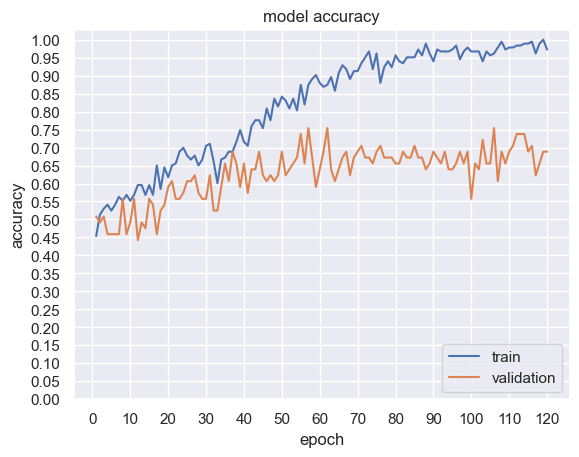

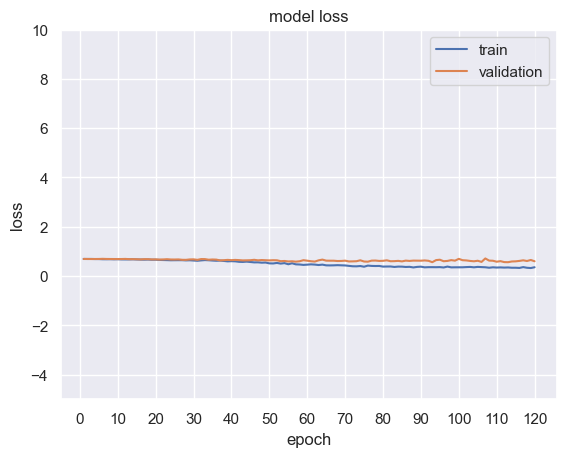

Training Finished!!!


In [1]:
import glob
import os
import numpy as np
import torch
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision.transforms import v2
import torchvision.models as models
import torch.nn as nn
import cv2
from torch.utils.data import Dataset
from pathlib import Path
from typing import List, Tuple
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる
%matplotlib inline

time = datetime.datetime.now()
filedate=time.strftime('%Y%m%d_%H%M')

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

Channels=3
batch_size=8
epochs=120
IMG_SIZE=224
valsplit=0.25

Classes = ["Damage", "NoDamage"]
ClassNum = len(Classes)

trainpath=r"C:\Users\kyohe\Aerial-Photo-Classifier\20241023Data\Train_SameSize"
savepath=r"C:\Users\kyohe\Aerial-Photo-Classifier\20241023Data\Weights"
historypath=r"C:\Users\kyohe\Aerial-Photo-Classifier\20241023Data\History"

'''
PytorchではDataloaderという,膨大なデータセットからでもメモリを圧迫せずに取り出せてforループにも対応するための枠組みがある
データセットをDataloaderが引っ張ってこれるような形式にするためにMyDataset(torch.utils.data.Dataset)というクラスを作れば，
あとはそのメソッドをtorch.utils.data.Datasetが勝手に使用してデータを加工してくれる
__init__, __getitem__, __len__をクラス内で必ず定義しなければならない
Dataloader内のデータはバッチごとにまとめられる
'''
class MyDataset(Dataset):
    def __init__(self, root: str, transforms, Classes) -> None:
        super().__init__()
        self.transforms = transforms
        self.Classes = Classes
        #globは複数のファイルのパスをまとめて取得する
        #訓練と訓練白黒の二個下のディレクトリから画像を取得
        self.data = list(sorted(Path(root).glob("*\*")))


    # ここで取り出すデータを指定している
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        data = self.data[index]
        #OpenCVで読み込むときは必ずRGBに変換
        img1 = cv2.cvtColor(cv2.imread(str(data)), cv2.COLOR_BGR2RGB)
        img1 = cv2.resize(img1, (IMG_SIZE, IMG_SIZE))
        img1 = TF.to_tensor(img1)

        # データの変形 (transforms)
        transformed_img = self.transforms(img1)

        #ラベル貼り：dataというパスを/で区切ってリストにし，クラス名のところをラベルに格納
        #クラス名は文字列なので，self.Classesの要素と比較して一致するところの番号をラベルとする
        label = str(data).split("\\")[-2]
        label = torch.tensor(self.Classes.index(label))

        return transformed_img, label

    # この method がないと DataLoader を呼び出す際にエラーを吐かれる
    def __len__(self) -> int:
        return len(self.data)


#入力データに施す処理
transforms = v2.Compose([
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0,0,0], std=[0.2, 0.2, 0.2]),
])


trainvalset = MyDataset(root=trainpath, transforms=transforms, Classes=Classes)
trainset, valset = random_split(trainvalset, [1-valsplit, valsplit])

trainloader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)
valloader = DataLoader(dataset=valset,batch_size=batch_size,shuffle=True)


resnet50 = models.resnet50(weights='DEFAULT')


resnet50.conv1 = torch.nn.Conv2d(Channels,64,kernel_size = (7,7),stride = (2,2), padding = (3,3), bias = False)
num_ftrs = resnet50.fc.in_features
#modifying final layer
resnet50.fc = nn.Linear(num_ftrs,ClassNum)

#GPUにニューラルネットワークを渡す
resnet50=resnet50.to(device)

#lossfunction&optimizer
#二値なのでBinaryCrossEntropy

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

print("Device:", device, "IMGSIZE:(", Channels, IMG_SIZE, IMG_SIZE, ")",  "BatchSize:", batch_size, "Epochs:", epochs, "Valsplit:", valsplit, "Class:", Classes, "Final Layer Nodes:", num_ftrs)

'''
trainiterator
enumerateはtrainloader内のすべてのdataに対してループし，繰り返し回数をbatchに渡すという意味
Dataloader内ではバッチごとにデータがまとめられるので1回の取り出しで1バッチ分のデータを丸々取り出せる
'''
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

def train(trainloader, valloader, model, loss_fn, optimizer, epochs):
    size = len(trainloader.dataset)
    num_batches = len(trainloader)
    size_val = len(valloader.dataset)
    num_batches_val = len(valloader)
    print("TrainData Size:", size, "TrainData Batches", num_batches, "ValData Size:", size_val, "ValData Batches:", num_batches_val)
    for epoch in range(epochs):
        running_loss, running_correct = 0, 0
        val_loss, val_correct = 0, 0
        for batch, (X, y) in enumerate(trainloader):
            X=X.to(device)
            y=y.to(device)
            # Compute prediction and loss
            pred = model(X)
            loss = loss_fn(torch.sigmoid(pred), y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            #損失と正解数の合計を計算しておき，後でそのエポック内での平均をとる
            running_loss += loss.item()
            running_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        epoch_loss = running_loss / num_batches
        epoch_acc = running_correct / size

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f'Epoch {epoch + 1} TrainLoss: {epoch_loss:.4f} TrainAcc: {epoch_acc:.4f}')

        # Set the model to evaluation mode - important for batch normalization and dropout layers
        model.eval()
        # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
        # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
        with torch.no_grad():
            for X, y in valloader:
                X=X.to(device)
                y=y.to(device)
                pred = model(X)
                val_loss += loss_fn(torch.sigmoid(pred), y).item()
                val_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            val_loss /= num_batches_val
            val_correct /= size_val
        # Set the model to train mode
        model.train()

        val_losses.append(val_loss)
        val_accuracies.append(val_correct)

        print(f'Epoch {epoch + 1} ValLoss: {val_loss:.4f} ValAcc: {val_correct:.4f}')

        #10epoch毎にパラメータを別々のフォルダに保存
        e1=epoch+1
        if (e1 % 10 == 0):
            savepath2 = Path(savepath+"\\"+str(e1)+"\model_weights"+filedate+".pth")
            print('Saving Model...')
            torch.save(model.state_dict(), savepath2)
            print('Model saved in', savepath2)

        print(' ')

train(trainloader, valloader, resnet50, loss_fn, optimizer, epochs)

#グラフ可視化
#pltの(x,y)のxにあたるepochのリスト　1から開始
ep=np.arange(1, epochs+1)

#グラフにプロットする正解率と損失のリストをCSVに書き出し to_csvは新規フォルダを作ってくれないのでosで作る
historypath2 = str(Path(historypath+"\\"+filedate))
os.mkdir(historypath2)
pd.DataFrame(data=np.array([ep, train_accuracies]).T, columns=["Epoch", "Accuracy"]).to_csv(Path(historypath2+"\\"+"Train_Acc.csv"))
pd.DataFrame(data=np.array([ep, train_losses]).T, columns=["Epoch", "Loss"]).to_csv(Path(historypath2+"\\"+"Train_Loss.csv"))
pd.DataFrame(data=np.array([ep, val_accuracies]).T, columns=["Epoch", "Accuracy"]).to_csv(Path(historypath2+"\\"+"Val_Acc.csv"))
pd.DataFrame(data=np.array([ep, val_losses]).T, columns=["Epoch", "Loss"]).to_csv(Path(historypath2+"\\"+"Val_Loss.csv"))
print("CSVs saved in", historypath2)

def plot_acc(train_accuracies, val_accuracies):
    plt.plot(ep, train_accuracies)
    plt.plot(ep, val_accuracies)
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.xticks(np.arange(0, epochs+1, 10))
    plt.yticks(np.arange(0.0, 1.05, 0.05))
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

def plot_loss(train_losses, val_losses):
    plt.plot(ep, train_losses)
    plt.plot(ep, val_losses)
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.xticks(np.arange(0, epochs+1, 10))
    plt.ylim(bottom=-5, top=10)
    plt.legend(["train", "validation"], loc="upper right")
    plt.show()

plot_acc(train_accuracies, val_accuracies)
plot_loss(train_losses, val_losses)

print('Training Finished!!!')